# Week 7 Assignment

This week we are collecting some data from Reddit and doing some basic EDA on it. You should:

- create your Reddit account and API keys
- collect data from a subreddit of your choice
    - at a minimum, collect the posts from the subreddit; optionally collect comments on the posts
- save the data to a SQLite3 database
- perform some basic EDA on the data
    - create at least 2 plots
- write a short analysis at the end describing the process and results
- turn in the Jupyter Notebook and PDF printout or export to the week 7 dropbox

***Optional* advanced section**
- Practice SQL queries and select a subsection of the posts you collected
- Modify your code to collect data beyond the 1000 item limit
- Collect comments from the posts for analysis next week and do some EDA on the comments (e.g. who is the top commenter, which commenters have the most up and down votes or most controversial posts, etc)
- examine n-grams ([bigrams](https://stackoverflow.com/a/37651184/4549682), trigrams) or [collocations](https://www.geeksforgeeks.org/nlp-word-collocations/)

Note: There is no solution file for this week.

<hr>

# Week 7 Assignment - Charles Alders

## Reddit API to DataFrame

In [15]:
import pandas as pd
import praw

import credentials

In [16]:
reddit = praw.Reddit(client_id=credentials.client_id,
                    client_secret=credentials.client_secret,
                    user_agent=credentials.user_agent)

In [17]:
ds_subreddit = reddit.subreddit('datascience').hot(limit=None)

In [18]:
reddit_data = {
    "title": [],
    "author": [],
    "n_comments": [],
    "score": [],
    "text": [],
    "link": []
}

for post in list(ds_subreddit):
    reddit_data["title"].append(post.title)
    if post.author is None:
        reddit_data["author"].append('')
    else:
        reddit_data["author"].append(post.author.name)

    reddit_data["n_comments"].append(post.num_comments)
    reddit_data["score"].append(post.score)
    reddit_data["text"].append(post.selftext)
    reddit_data["link"].append(post.permalink)

In [19]:
ds_df = pd.DataFrame(reddit_data)

In [20]:
ds_df.head()

,title,author,n_comments,score,text,link
0,Weekly Entering & Transitioning - Thread 20 Fe...,AutoModerator,75,7,\n\nWelcome to this week's entering & transit...,/r/datascience/comments/116y7t5/weekly_enterin...
1,Why is the field called Data Science and not C...,Spontanous_cat,147,217,I feel like we would have less confusion had p...,/r/datascience/comments/11949lo/why_is_the_fie...
2,I feel so stressed to keep up withthis fast-pa...,Delay_no_more_1999,42,48,I feel like i can never keep up this rapid dev...,/r/datascience/comments/118vpor/i_feel_so_stre...
3,I had a conversation with a data science hirin...,WhoIsTheUnPerson,29,32,A friend of a friend of mine was at a dinner p...,/r/datascience/comments/118vld0/i_had_a_conver...
4,Do companies actually look at GitHub?,Wizzman17,36,50,Been having difficulty even getting first roun...,/r/datascience/comments/118sfhy/do_companies_a...


## To SQLite

In [24]:
import sqlite3

con = sqlite3.connect("data/ds_reddit.sqlite")
ds_df.to_sql('posts', con, if_exists='replace', index=False)

942

In [25]:
check = pd.read_sql_query('SELECT * FROM posts;', con)
con.close()
check

,title,author,n_comments,score,text,link
0,Weekly Entering & Transitioning - Thread 20 Fe...,AutoModerator,75,7,\n\nWelcome to this week's entering & transit...,/r/datascience/comments/116y7t5/weekly_enterin...
1,Why is the field called Data Science and not C...,Spontanous_cat,147,217,I feel like we would have less confusion had p...,/r/datascience/comments/11949lo/why_is_the_fie...
2,I feel so stressed to keep up withthis fast-pa...,Delay_no_more_1999,42,48,I feel like i can never keep up this rapid dev...,/r/datascience/comments/118vpor/i_feel_so_stre...
3,I had a conversation with a data science hirin...,WhoIsTheUnPerson,29,32,A friend of a friend of mine was at a dinner p...,/r/datascience/comments/118vld0/i_had_a_conver...
4,Do companies actually look at GitHub?,Wizzman17,36,50,Been having difficulty even getting first roun...,/r/datascience/comments/118sfhy/do_companies_a...
...,...,...,...,...,...,...
937,Join us for a live webinar with Dr. Camille Ne...,mDOT_Center,1,1,,/r/datascience/comments/10lxe23/join_us_for_a_...
938,what % do you think is worth switching jobs for ?,eomar2828,27,20,I make \~160k(after bonus) + pre-IPO equity . ...,/r/datascience/comments/10ldhe7/what_do_you_th...
939,how to job hunt as a fresher + profile feedback,thetimeis_notnow,0,0,"Hi i have expertise in python, sql, tableau, E...",/r/datascience/comments/10m16md/how_to_job_hun...
940,Another One,Western_Moment7373,109,721,,/r/datascience/comments/10jd28b/another_one/


## EDA

<AxesSubplot:xlabel='score', ylabel='n_comments'>

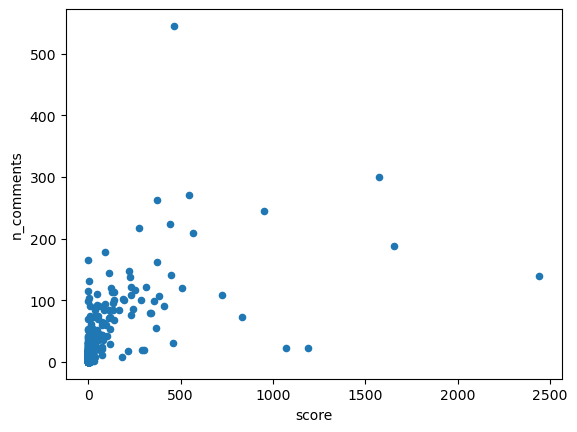

In [27]:
ds_df.plot.scatter(x="score", y="n_comments")

In [29]:
ds_df[["score", "n_comments"]].corr(method='pearson')

,score,n_comments
score,1.000000,0.584017
n_comments,0.584017,1.000000


There is a moderate positive correlation between score and comment number.

In [34]:
ds_df.shape[0]

942

<AxesSubplot:>

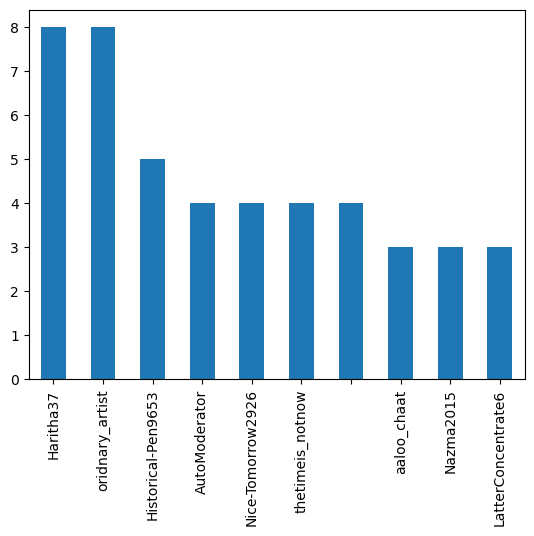

In [30]:
ds_df["author"].value_counts()[:10].plot.bar()

There are 942 posts, but the top poster only has 8 posts, so there is a good spread of posts among different authors.

In [39]:
ds_df.groupby("author")["score"].sum().sort_values(ascending=False)[:10]

author
cardsfan314           2443
Gentlecriminal14      1730
deepcontractor        1575
BrilliantCashew       1189
statisticant          1068
chartreuse_13          953
enDelt09               834
Western_Moment7373     721
immabee1990            564
burralohit01           545
Name: score, dtype: int64

Interestingly, the accounts that have the most upvotes over all of their posts do not show up on the top 10 authors with the most posts.

## Common Words Distribution using nltk

In [60]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
stops = stopwords.words('english')

stops = stops + ["data", "science", "-"]

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/charliealders/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [61]:
words = ' '.join(ds_df["title"]).lower().split()
cleaned_words = [w for w in words if w not in set(stops)]

In [62]:
fd = nltk.FreqDist(cleaned_words)
fd.most_common(20)

[('learning', 39),
 ('job', 35),
 ('ds', 34),
 ('ai', 33),
 ('using', 30),
 ('need', 28),
 ('advice', 28),
 ('best', 28),
 ('python', 28),
 ('interview', 28),
 ('work', 27),
 ('machine', 26),
 ('use', 25),
 ('anyone', 25),
 ('scientist', 24),
 ('help', 22),
 ('time', 21),
 ('new', 21),
 ('vs', 20),
 ('analysis', 20)]

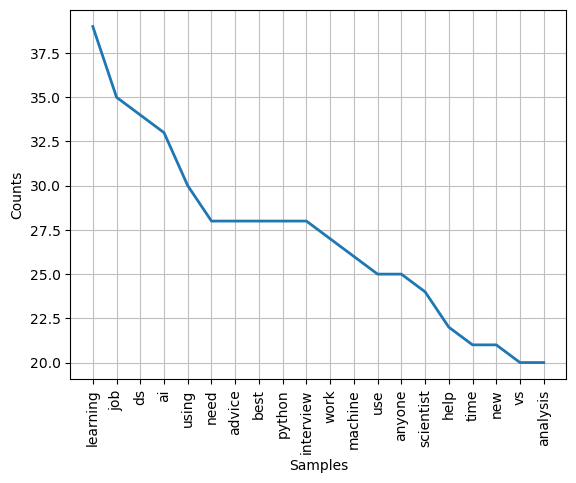

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [63]:
fd.plot(20)

# Analysis

In this assignment, I gathered data from the r/datascience subreddit using the Reddit API and praw Python package. The data returned from the API call was then converted into a list and iterated through, adding each post's corresponding value (title, author, etc.) to a dictionary, which was then turned into a pandas dataframe. I stored the dataframe in a SQLite file, which could be used to easily query the data using the sqlite3 package. In my EDA, I found that there is a moderate correlation between a post's score and the number of comments, which makes sense considering the higher scoring posts will show up more often on users' feeds, leading to more comments/upvotes. The dataframe ended up with 942 posts, but the top author had only posted 8 times, so there wasn't one person who was "keeping the subreddit alive" as there are for some others. The authors with the highest quantity of posts were actually not seen in the authors with the most upvotes, which is quite interesting. It seems that the users who post more have less quality content, leading to less upvotes. The frequency distribution of words left out the obvious 'stopwords' as well as some others, such as 'data', 'science', and '-', which all appeared quite often. With the new list of words, 'learning', 'job', 'ds', and 'ai' showed up the most. These are likely the most common words because machine *learning* and *ai* are very big concepts in data science, and *job* is a hot topic, as many people are looking for data science jobs.